# Lab-Assignment-6

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [36]:
# function for read data from csv and copying of sequence to numpy vector
def load_dataset():
    num_rows = sum(1 for line in open('headbrain.csv'))-2
    X = np.zeros((num_rows, 1))
    Y = np.zeros((num_rows, 1))
    with open('headbrain.csv') as f:
        reader = csv.DictReader(f, delimiter=',')
        next(reader, None)
        for i, row in enumerate(reader):
            X[i] = int(row['Head Size(cm^3)']) if len(row['Head Size(cm^3)']) > 0 else 0
            Y[i] = int(row['Brain Weight(grams)']) if len(row['Brain Weight(grams)']) > 0 else 0
    return X, Y


In [38]:
X, Y = load_dataset()

def mean(values):
    return sum(values) / float(len(values))

def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

def stdev(data):
    var = variance(data)
    std_dev = (var)**0.5
    return std_dev
#calculating mean of X and Y
X_mean = mean(X)
Y_mean = mean(Y)

#calculating the standard deviation of X and Y
sd_X = stdev(X)
sd_Y = stdev(Y)
print("Mean of X :", X_mean, "\nMean of Y :", Y_mean)
print()
print("Standard deviation of X :", sd_X, "\nStandard deviation of Y :", sd_Y)

Mean of X : [3633.99156118] 
Mean of Y : [1282.87341772]

Standard deviation of X : [364.49001412] 
Standard deviation of Y : [120.08629461]


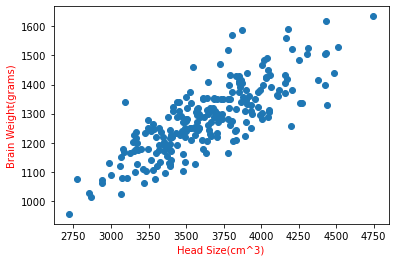

In [41]:
# scatter plot of data
def visualize_dataset(X, Y):
    plt.xlabel('Head Size(cm^3)',color ='red')
    plt.ylabel('Brain Weight(grams)',color ='red')
    plt.scatter(X, Y)
    plt.show()
if __name__ == '__main__':
    X, Y = load_dataset()
    visualize_dataset(X, Y)

In [43]:
#checking for association
def correlation(X, X_mean, Y, Y_mean, sd_X, sd_Y):
    n = len(X)
    corr = (sum(((X-X_mean)/sd_X)*((Y-Y_mean)/sd_Y)))/(n)
    return corr

corr = correlation(X, X_mean, Y, Y_mean, sd_X, sd_Y)
print("Association between X and Y is ", corr)

Association between X and Y is  [0.79956971]


In [53]:
# Fit the model
# 6.1 Compute Beta_0 and Beta_1 from observations
# 6.2. Create your fitted line y = Beta_0 + Beta_1 * X 

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
    
beta_1 = num / den
beta_0 = Y_mean - beta_1*X_mean

print("the value of beta-1 :",beta_1,"\nthe value of beta-0 : ", beta_0)

the value of beta-1 : [0.26342934] 
the value of beta-0 :  [325.57342105]


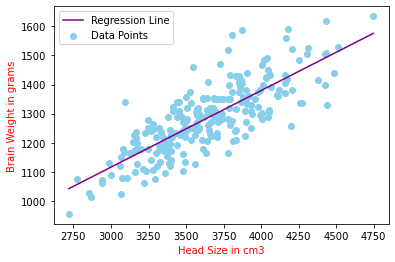

In [56]:
# Plot the fitted line 
# Making predictions
Y_pred = beta_1*X + beta_0

plt.scatter(X, Y,color='skyblue', label='Data Points') # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='purple', label='Regression Line') # predicted
plt.xlabel('Head Size in cm3', color = 'red')
plt.ylabel('Brain Weight in grams', color = 'red')
plt.legend()
plt.show()

In [66]:
# Calculate R-Square
ss_t = 0
ss_r = 0
for i in range(237):
    Y_pred = beta_1*X[i] + beta_0
    ss_t += (Y[i] - Y_mean) ** 2
    ss_r += (Y[i] - Y_pred) ** 2

r_square = 1 - (ss_r/ss_t)
print("The R-square is : ", r_square)

The R-square is :  [0.63931172]


In [78]:
# Create Anova Table
# let's find attributes of anova table 
# we know the degree of freedom for regression is 1 for residual is n-2 and total is n-1
ss_regression = 0.0
ss_residual = 0.0
for i in range(237):
    Y_pred = beta_1*X[i] + beta_0
    ss_regression += (Y_pred-Y_mean)**2
    ss_residual += (Y[i]-Y_pred)**2
    
print("SS_regression :", ss_regression, "\nSS_residual:", ss_residual,"\nSS_total :", ss_regression+ss_residual)

SS_regression : [2184982.1878951] 
SS_residual: [1232728.01463655] 
SS_total : [3417710.20253165]


In [86]:
n = len(X)
ms_regression = (ss_regression/1)
ms_residual = (ss_residual/(n-2))
print("MS Regression :", ms_regression, "\nMS Residual :", ms_residual)

MS Regression : [2184982.1878951] 
MS Residual : [5245.65112611]


In [90]:
F_stats = (ms_regression/ms_residual)
print("F-stats for data : ", F_stats)
std_Error = (ms_residual**0.5) 
print("Standared Error :", std_Error)

F-stats for data :  [416.53212068]
Standared Error : [72.42686743]


In [102]:
# anova table
F_significant = 5.96E-54 #from table
print("ANOVA\n","\t\t","degree of freedom\t\t", "SS\t\t", "MS\t\t", "\tF-stats\t", "\t\tsignificance-F")
print("\nRegression\t\t", 1, "\t\t", ss_regression, "\t", ms_regression, "\t", F_stats, "\t", F_significant)
print("\nResidual\t", "237-2 =", 235, "\t\t", ss_residual, "\t", ms_residual )
print("\nTotal\t\t", "237-1 =", 236, "\t\t", ss_regression+ss_residual )

ANOVA
 		 degree of freedom		 SS		 MS		 	F-stats	 		significance-F

Regression		 1 		 [2184982.1878951] 	 [2184982.1878951] 	 [416.53212068] 	 5.96e-54

Residual	 237-2 = 235 		 [1232728.01463655] 	 [5245.65112611]

Total		 237-1 = 236 		 [3417710.20253165]
